In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import linear_model, datasets

sns.set_theme(style="whitegrid")

# Robustez en regresiones

## Outliers vs High Leverage Observations

In [2]:
df = pd.read_csv(
    "https://drive.google.com/uc?export=download&id=1yoA3ua0zL6ecG66q5WDchR_iL1sj6v4M"
)

In [3]:
df.head()

,Unnamed: 0,xx,yy
0,1,4,9.600000
1,2,5,11.200000
2,3,6,11.992446
3,4,7,12.500000
4,5,8,45.000000


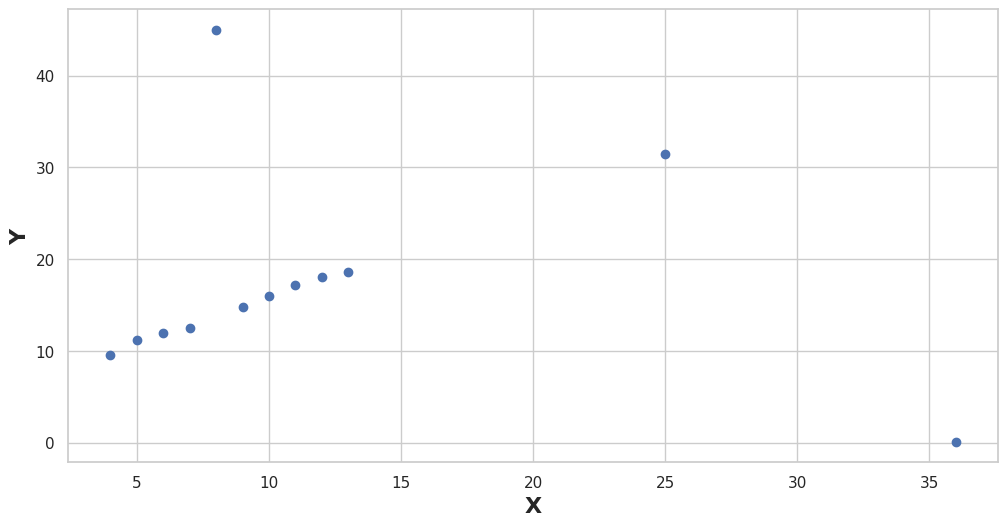

In [4]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.scatter(df['xx'], df['yy'])
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)
plt.show()

Primero tratamos con una regresión clásica

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression()
model.fit(df['xx'].values.reshape(-1, 1), df['yy'])

LinearRegression()

Calculamos el $R^2$ de la recta:

In [7]:
r2 = model.score(df['xx'].values.reshape(-1, 1), df['yy'])

Graficamos la recta obtenida:

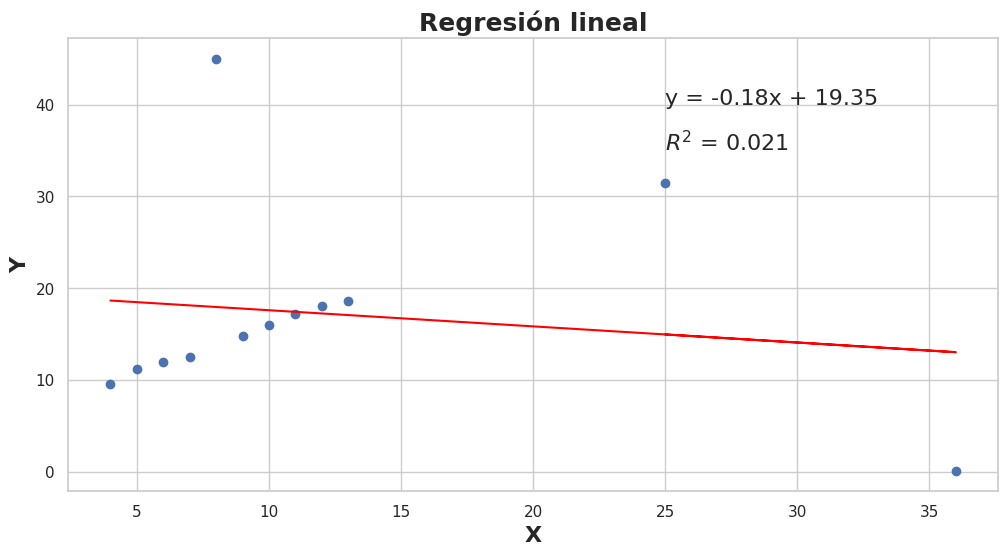

In [8]:
pred_linear = model.predict(df['xx'].values.reshape(-1, 1))
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.scatter(df['xx'], df['yy'])
plt.plot(df['xx'], pred_linear, color='red')
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)
plt.title("Regresión lineal", weight="bold", fontsize=18)
plt.text(
    25, 40, "y = {:.2f}x + {:.2f}".format(model.coef_[0], model.intercept_), fontsize=16
)
plt.text(25, 35, r"$R^2$ = {:.3f}".format(r2), fontsize=16)
plt.show()

Puntos con **alto leverage** son puntos que tienen valores inusuales de los predictores (variables dependientes) o una combinación no usual de predictores(si tenemos más de 1 variable independiente) pero no necesariamente son outliers. En el gráfico de arriba tenemos 2 puntos con alto leverage, y uno es un outlier y otro parece seguir la tendencia de los datos.

Por ejemplo, si realizamos una regresión sacando los dos outliers, y fitteando con y sin el punto de alto leverage pero que parece seguir la tendencia de los datos obtenemos:

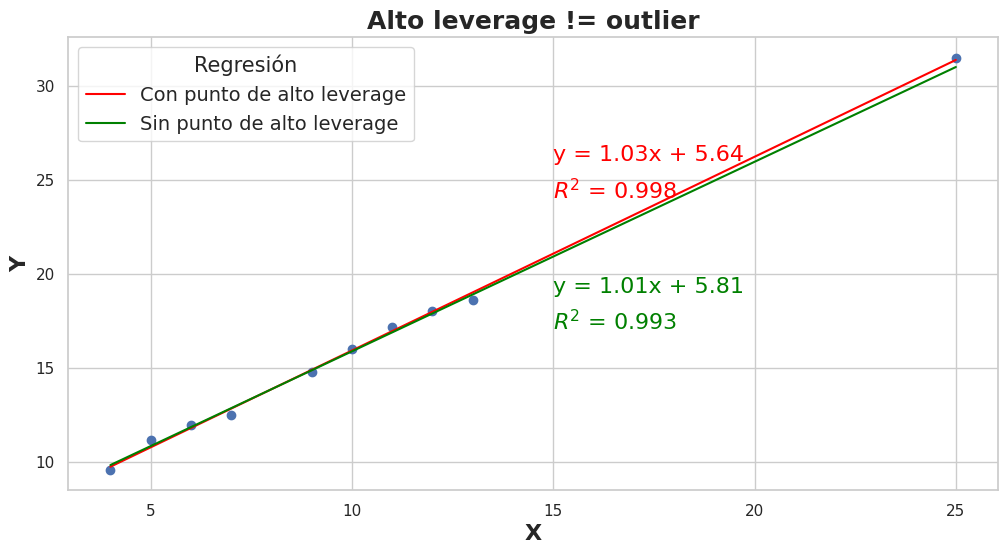

In [9]:
# Entreno modelo con punto de alto leverage y sin outlier
df_leverage = df.copy()
df_leverage = df_leverage.drop([4, 10])
model_leverage = LinearRegression()
model_leverage.fit(df_leverage['xx'].values.reshape(-1, 1), df_leverage['yy'])
r2_leverage = model_leverage.score(
    df_leverage['xx'].values.reshape(-1, 1), df_leverage['yy']
)
pred_leverage = model_leverage.predict(df_leverage['xx'].values.reshape(-1, 1))

# Entreno modelo sin puntos de alto leverage y sin outliers
df_inliers = df.copy()
df_inliers = df_inliers.drop([4, 10, 11])
model_inliers = LinearRegression()
model_inliers.fit(df_inliers['xx'].values.reshape(-1, 1), df_inliers['yy'])
r2_inliers = model_inliers.score(
    df_inliers['xx'].values.reshape(-1, 1), df_inliers['yy']
)
pred_inliers = model_inliers.predict(df_leverage['xx'].values.reshape(-1, 1))

fig = plt.figure(figsize=(12, 6), dpi=100)
plt.scatter(df_leverage['xx'], df_leverage['yy'])

plt.plot(
    df_leverage['xx'], pred_leverage, color='red', label="Con punto de alto leverage"
)
plt.plot(
    df_leverage['xx'], pred_inliers, color='green', label="Sin punto de alto leverage"
)

plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

plt.text(
    15,
    26,
    "y = {:.2f}x + {:.2f}".format(model_leverage.coef_[0], model_leverage.intercept_),
    fontsize=16,
    color="red",
)
plt.text(15, 24, r"$R^2$ = {:.3f}".format(r2_leverage), fontsize=16, color="red")

plt.text(
    15,
    19,
    "y = {:.2f}x + {:.2f}".format(model_inliers.coef_[0], model_inliers.intercept_),
    fontsize=16,
    color="green",
)
plt.text(15, 17, r"$R^2$ = {:.3f}".format(r2_inliers), fontsize=16, color="green")
plt.title("Alto leverage != outlier", weight="bold", fontsize=18)
plt.legend(loc=2, fontsize=14, title="Regresión").get_title().set_fontsize(15)
plt.show()

Vemos que el $R^2$ se ve poco afectado por el punto de alto leverage.

#### Volviendo a la regresión con todos los puntos:

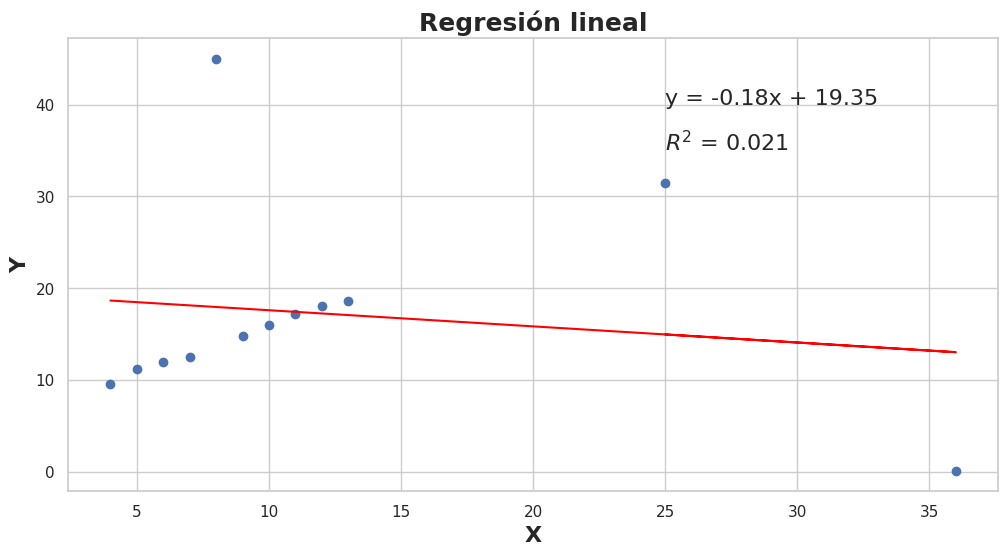

In [10]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.scatter(df['xx'], df['yy'])
plt.plot(df['xx'], pred_linear, color='red')

plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)
plt.title("Regresión lineal", weight="bold", fontsize=18)
plt.text(
    25, 40, "y = {:.2f}x + {:.2f}".format(model.coef_[0], model.intercept_), fontsize=16
)
plt.text(25, 35, r"$R^2$ = {:.3f}".format(r2), fontsize=16)
plt.show()

Como podemos ver, la recta ajustada es muy mala, veamos ahora que sucede con una regresión robusta mediante la función de Huber para calcular la pérdida. Usamos [HuberRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html) para ello.

In [11]:
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import r2_score

In [12]:
huber = HuberRegressor(epsilon=1.35).fit(df['xx'].values.reshape(-1, 1), df['yy'])

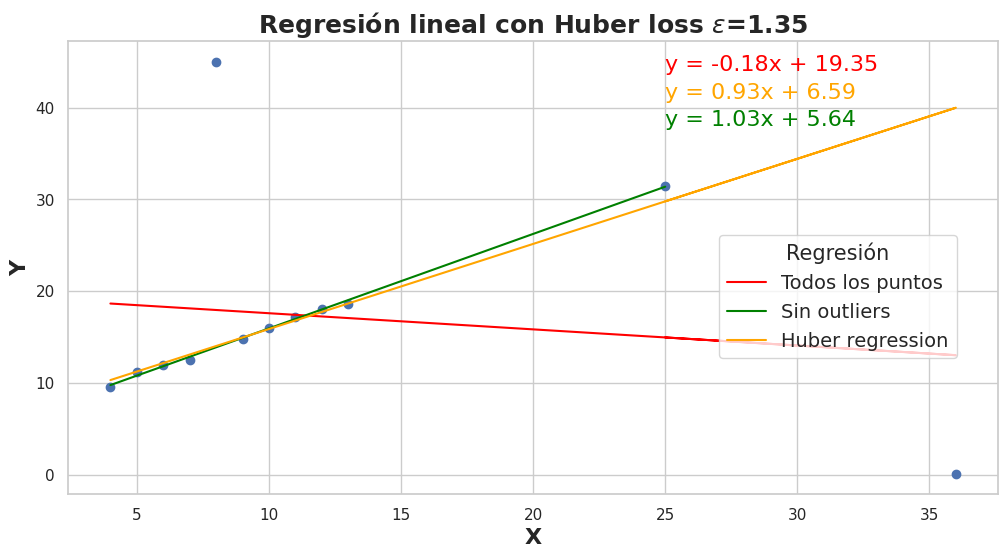

In [13]:
pred_huber = huber.predict(df['xx'].values.reshape(-1, 1))
r2_huber = huber.score(df['xx'].values.reshape(-1, 1), df['yy'])

fig = plt.figure(figsize=(12, 6), dpi=100)
plt.scatter(df['xx'], df['yy'])
plt.plot(df['xx'], pred_linear, color='red', label="Todos los puntos")
plt.plot(df_leverage['xx'], pred_leverage, color='green', label="Sin outliers")
plt.plot(df['xx'], pred_huber, color='orange', label="Huber regression")


plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)
plt.title("Regresión lineal con Huber loss $\epsilon$=1.35", weight="bold", fontsize=18)
plt.text(
    25,
    38,
    "y = {:.2f}x + {:.2f}".format(model_leverage.coef_[0], model_leverage.intercept_),
    fontsize=16,
    color="green",
)
plt.text(
    25,
    41,
    "y = {:.2f}x + {:.2f}".format(huber.coef_[0], huber.intercept_),
    fontsize=16,
    color="orange",
)
plt.text(
    25,
    44,
    "y = {:.2f}x + {:.2f}".format(model.coef_[0], model.intercept_),
    fontsize=16,
    color="red",
)

plt.legend(loc=(0.7, 0.3), fontsize=14, title="Regresión").get_title().set_fontsize(15)
plt.show()

La recta esta mucho mejor ajustada, aunque todavía no es la ideal. Esto es debido a que la función de huber le resta importancia a los outliers pero no los elimina por completo.

Que pasa si aumentamos el valor de epsilon?

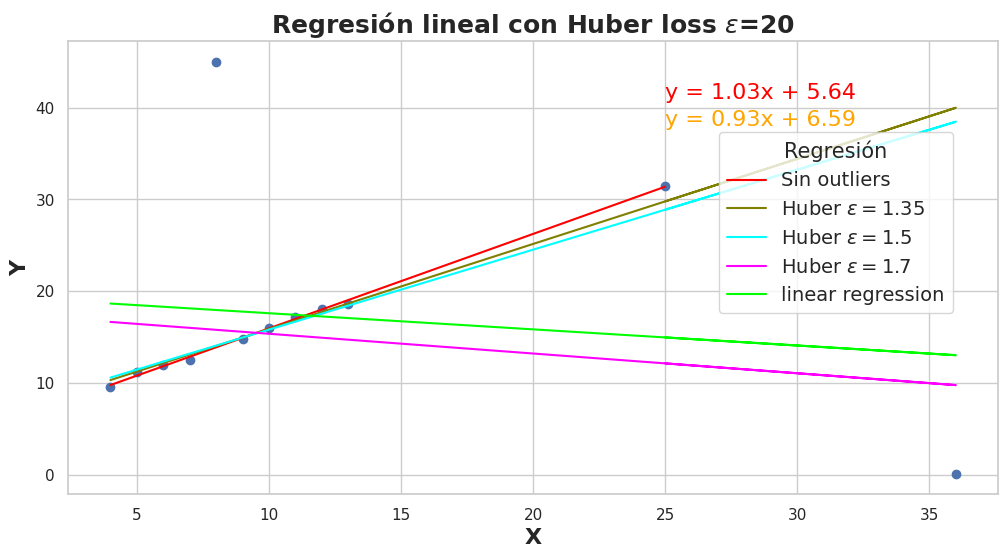

In [14]:
huber_eps_1_35 = HuberRegressor(alpha=0.01, epsilon=1.35).fit(
    df['xx'].values.reshape(-1, 1), df['yy']
)
pred_huber_eps_1_35 = huber_eps_1_35.predict(df['xx'].values.reshape(-1, 1))

huber_eps_1_5 = HuberRegressor(alpha=0.01, epsilon=1.5).fit(
    df['xx'].values.reshape(-1, 1), df['yy']
)
pred_huber_eps_1_5 = huber_eps_1_5.predict(df['xx'].values.reshape(-1, 1))

huber_eps_1_7 = HuberRegressor(alpha=0.01, epsilon=1.7).fit(
    df['xx'].values.reshape(-1, 1), df['yy']
)
pred_huber_eps_1_7 = huber_eps_1_7.predict(df['xx'].values.reshape(-1, 1))


fig = plt.figure(figsize=(12, 6), dpi=100)
plt.scatter(df['xx'], df['yy'])

plt.plot(df_leverage['xx'], pred_leverage, color='red', label="Sin outliers")
plt.plot(df['xx'], pred_huber_eps_1_35, color='olive', label=r"Huber $\epsilon = 1.35$")
plt.plot(df['xx'], pred_huber_eps_1_5, color='cyan', label=r"Huber $\epsilon = 1.5$")
plt.plot(df['xx'], pred_huber_eps_1_7, color='magenta', label=r"Huber $\epsilon = 1.7$")
plt.plot(df['xx'], pred_linear, color='lime', label="linear regression")

plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)
plt.title(r"Regresión lineal con Huber loss $\epsilon$=20", weight="bold", fontsize=18)
plt.text(
    25,
    41,
    "y = {:.2f}x + {:.2f}".format(model_leverage.coef_[0], model_leverage.intercept_),
    fontsize=16,
    color="red",
)
plt.text(
    25,
    38,
    "y = {:.2f}x + {:.2f}".format(huber.coef_[0], huber.intercept_),
    fontsize=16,
    color="orange",
)
plt.legend(loc=(0.7, 0.4), fontsize=14, title="Regresión").get_title().set_fontsize(15)

plt.show()

## [RANSAC Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html)

In [15]:
from sklearn.linear_model import RANSACRegressor

In [16]:
RANSAC_model = RANSACRegressor(residual_threshold=15).fit(
    df['xx'].values.reshape(-1, 1), df['yy']
)

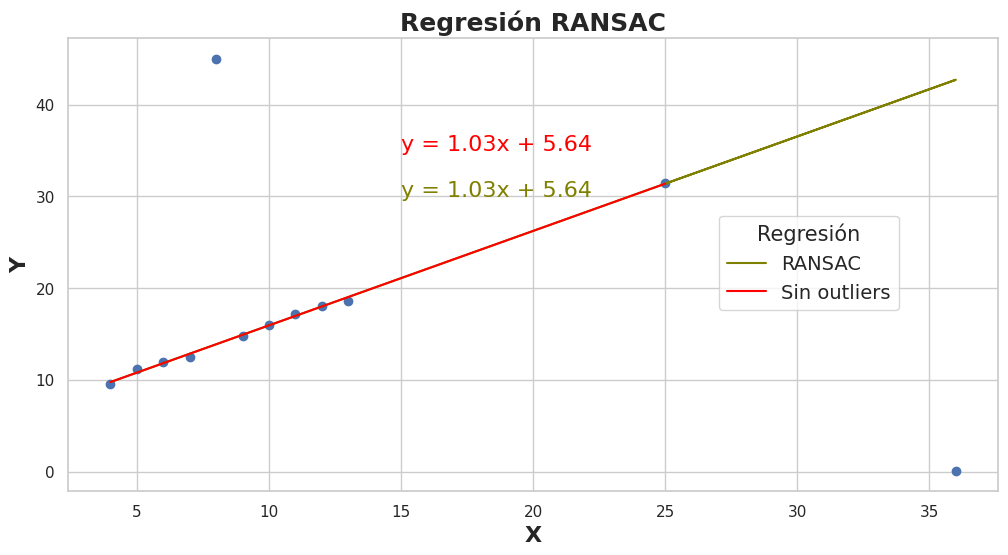

In [17]:
pred_ransac = RANSAC_model.predict(df['xx'].values.reshape(-1, 1))
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.scatter(df['xx'], df['yy'])
plt.plot(df['xx'], pred_ransac, color='olive', label="RANSAC")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)
plt.plot(df_leverage['xx'], pred_leverage, color='red', label="Sin outliers")
plt.text(
    15,
    35,
    "y = {:.2f}x + {:.2f}".format(model_leverage.coef_[0], model_leverage.intercept_),
    fontsize=16,
    color="red",
)
plt.text(
    15,
    30,
    "y = {:.2f}x + {:.2f}".format(
        RANSAC_model.estimator_.coef_[0], RANSAC_model.estimator_.intercept_
    ),
    fontsize=16,
    color="olive",
)
plt.title("Regresión RANSAC", weight="bold", fontsize=18)
plt.legend(loc=(0.7, 0.4), fontsize=14, title="Regresión").get_title().set_fontsize(15)

plt.show()

La regresión obtenida es igual a la obtenida sin tener en cuenta los puntos outliers en este caso (caso particular). Sin embargo es "mejor" que la regresión lineal y que Huber.

Hasta cuantos Outliers soporta RANSAC?

Text(0, 0.5, 'Y')

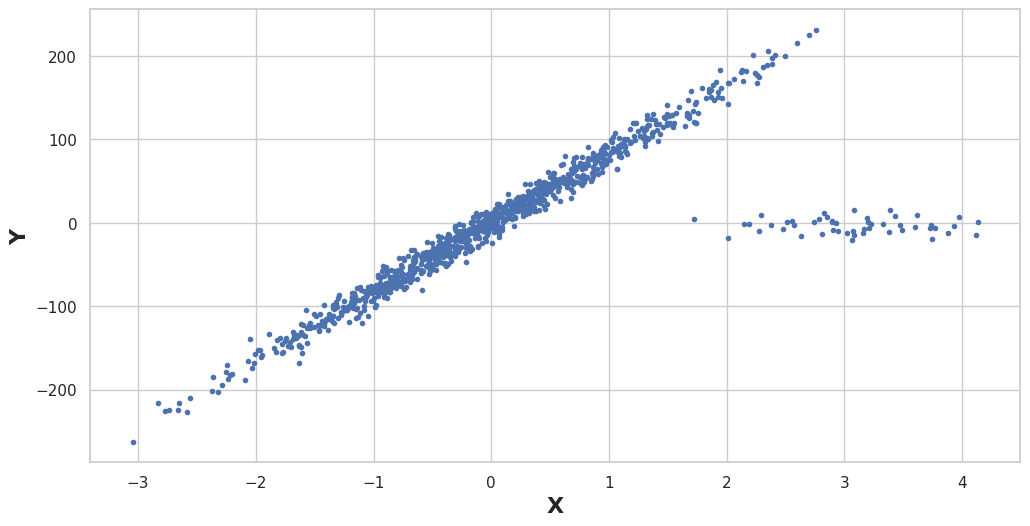

In [18]:
n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

fig = plt.figure(figsize=(12, 6), dpi=100)

plt.scatter(X, y, marker='.')
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Entreno regresión lineal, RANSAC y Theil Sen, aumento despues los puntos "outliers".

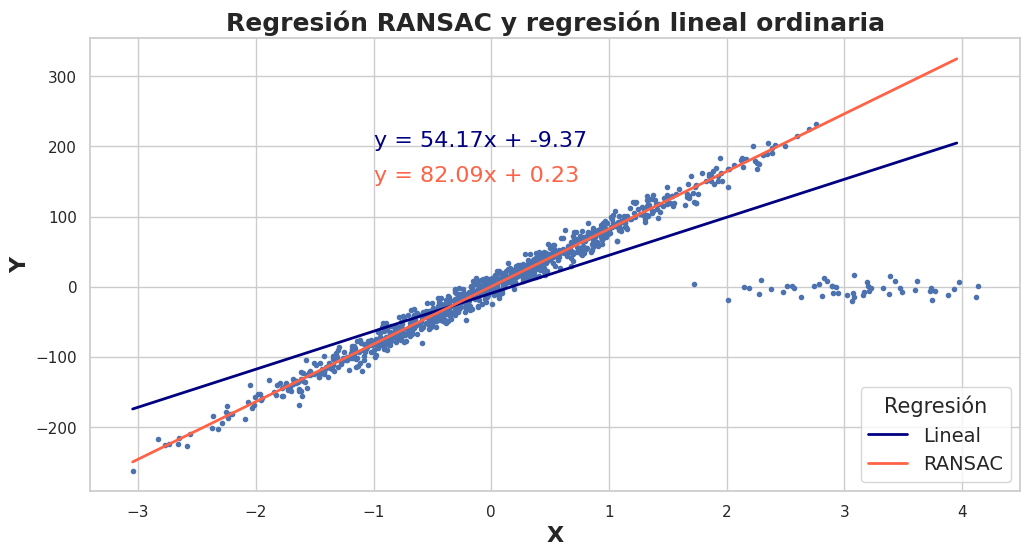

In [19]:
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Entreno RANSAC
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)

# Datos predichos para graficar después
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

lw = 2
fig = plt.figure(figsize=(12, 6), dpi=100)

plt.scatter(X, y, marker='.')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Lineal')
plt.plot(line_X, line_y_ransac, color='tomato', linewidth=lw, label='RANSAC')
plt.legend(loc='lower right', title="Regresión", fontsize=14).get_title().set_fontsize(
    15
)
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)
plt.text(
    -1,
    150,
    "y = {:.2f}x + {:.2f}".format(
        ransac.estimator_.coef_[0], ransac.estimator_.intercept_
    ),
    fontsize=16,
    color="tomato",
)
plt.text(
    -1,
    200,
    "y = {:.2f}x + {:.2f}".format(lr.coef_[0], lr.intercept_),
    fontsize=16,
    color="navy",
)

plt.title("Regresión RANSAC y regresión lineal ordinaria", weight="bold", fontsize=18)
plt.show()

In [20]:
from sklearn.linear_model import TheilSenRegressor

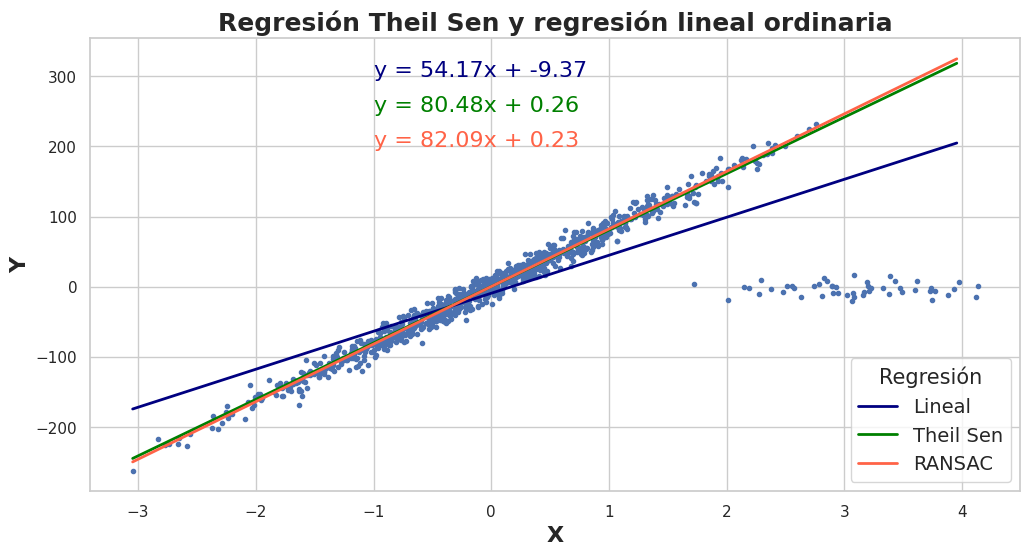

In [21]:
lr.fit(X, y)

# Entreno RANSAC
theil_model = TheilSenRegressor(random_state=42).fit(X, y)

# Datos predichos para graficar después
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_theil = theil_model.predict(line_X)

lw = 2
fig = plt.figure(figsize=(12, 6), dpi=100)

plt.scatter(X, y, marker='.')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Lineal')
plt.plot(line_X, line_y_theil, color='green', linewidth=lw, label='Theil Sen')
plt.plot(line_X, line_y_ransac, color='tomato', linewidth=lw, label='RANSAC')
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

plt.text(
    -1,
    300,
    "y = {:.2f}x + {:.2f}".format(lr.coef_[0], lr.intercept_),
    fontsize=16,
    color="navy",
)
plt.text(
    -1,
    250,
    "y = {:.2f}x + {:.2f}".format(theil_model.coef_[0], theil_model.intercept_),
    fontsize=16,
    color="green",
)
plt.text(
    -1,
    200,
    "y = {:.2f}x + {:.2f}".format(
        ransac.estimator_.coef_[0], ransac.estimator_.intercept_
    ),
    fontsize=16,
    color="tomato",
)
plt.title(
    "Regresión Theil Sen y regresión lineal ordinaria", weight="bold", fontsize=18
)
plt.legend(loc='lower right', title="Regresión", fontsize=14).get_title().set_fontsize(
    15
)

plt.show()

Regresión Theil Sen y RANSAC muy buenas en este caso, y con resultados muy parecidos.

Ahora aumentamos cantidad de outliers:

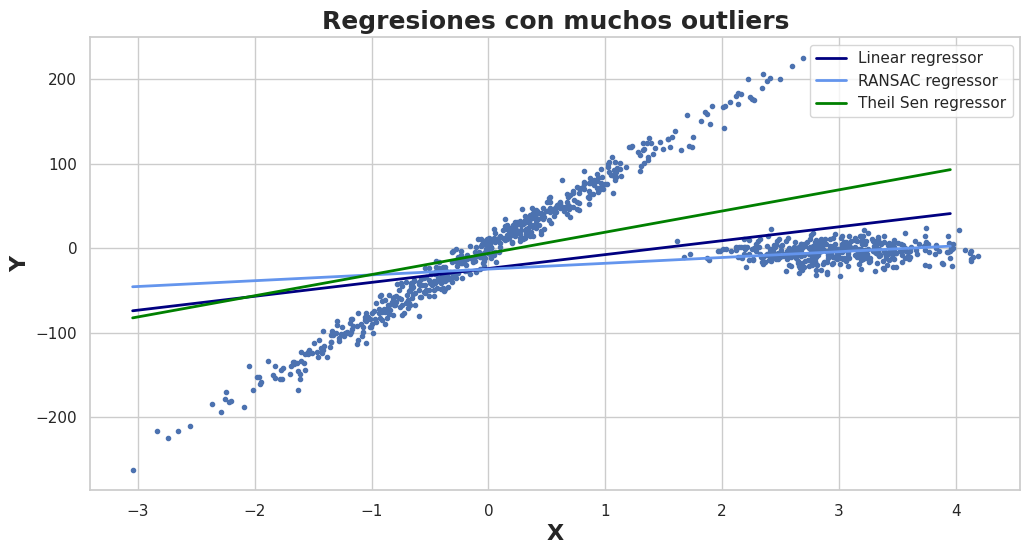

In [22]:
n_samples = 1000
n_outliers = 410


X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

# Add outlier data
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# Fit line using all data
lr = linear_model.LinearRegression()
lr.fit(X, y)

# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)

theil_model = TheilSenRegressor(random_state=42).fit(X, y)


# Predict data of estimated models
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)
line_y_theil = theil_model.predict(line_X)

fig = plt.figure(figsize=(12, 6), dpi=100)

plt.scatter(X, y, marker='.')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(
    line_X,
    line_y_ransac,
    color='cornflowerblue',
    linewidth=lw,
    label='RANSAC regressor',
)
plt.plot(line_X, line_y_theil, color='green', linewidth=lw, label='Theil Sen regressor')
plt.legend(loc='upper right')
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)
plt.title("Regresiones con muchos outliers", weight="bold", fontsize=18)
plt.show()

Puedo usar cualquier estimador dentro de RANSAC:

In [23]:
ransac_theil = linear_model.RANSACRegressor(
    base_estimator=TheilSenRegressor(random_state=42), random_state=1
)
ransac_theil.fit(X, y)
line_y_ransac_theil = ransac_theil.predict(line_X)

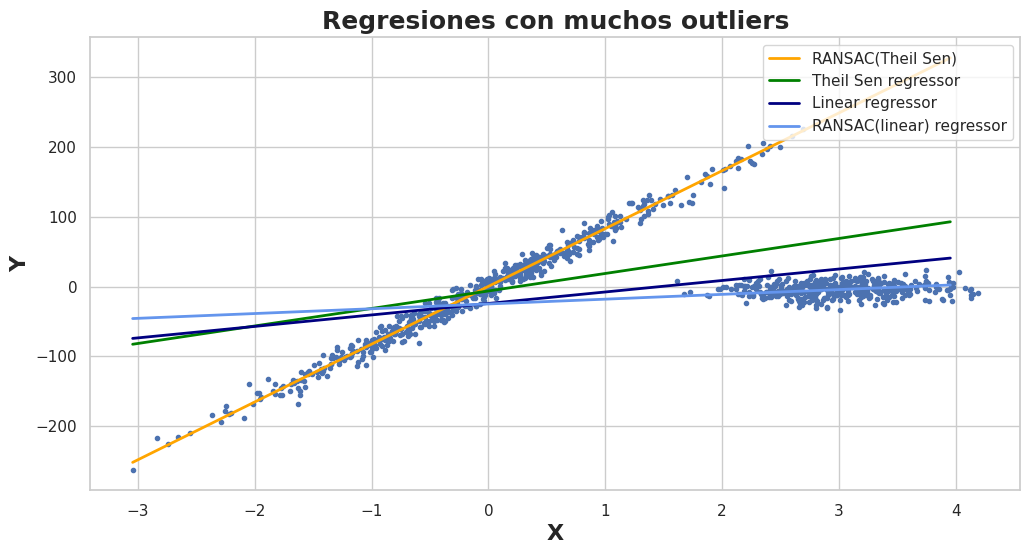

In [24]:
fig = plt.figure(figsize=(12, 6), dpi=100)

plt.plot(
    line_X, line_y_ransac_theil, color='orange', linewidth=lw, label='RANSAC(Theil Sen)'
)
plt.plot(line_X, line_y_theil, color='green', linewidth=lw, label='Theil Sen regressor')
plt.plot(line_X, line_y, color='navy', linewidth=lw, label='Linear regressor')
plt.plot(
    line_X,
    line_y_ransac,
    color='cornflowerblue',
    linewidth=lw,
    label='RANSAC(linear) regressor',
)

plt.scatter(X, y, marker='.')
plt.legend(loc='upper right')
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)
plt.title("Regresiones con muchos outliers", weight="bold", fontsize=18)
plt.show()

Cuidado con métodos iterativos con inicialización

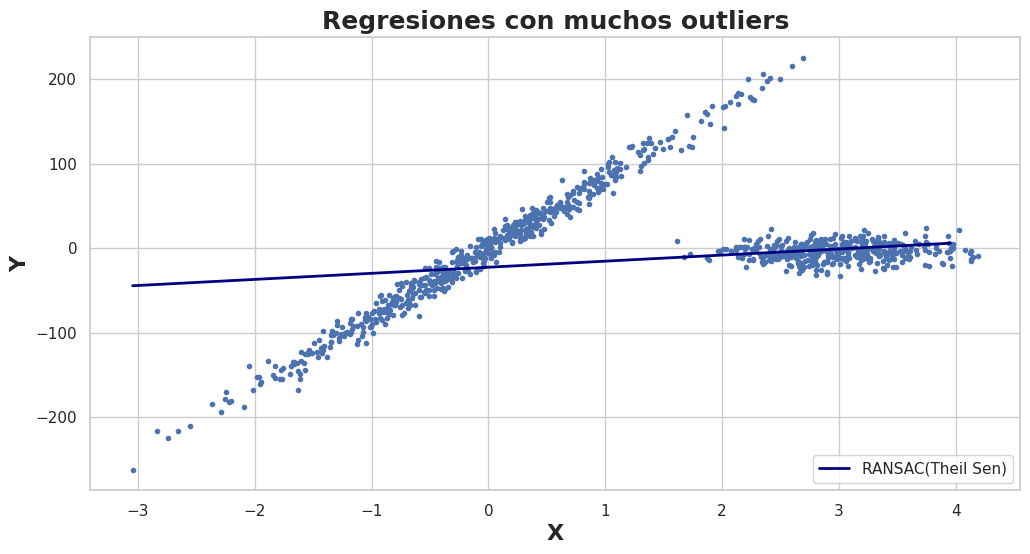

In [25]:
ransac_theil = linear_model.RANSACRegressor(
    base_estimator=TheilSenRegressor(random_state=42), random_state=42
)
ransac_theil.fit(X, y)
line_y_ransac_theil = ransac_theil.predict(line_X)
fig = plt.figure(figsize=(12, 6), dpi=100)

plt.plot(
    line_X, line_y_ransac_theil, color='navy', linewidth=lw, label='RANSAC(Theil Sen)'
)
plt.scatter(X, y, marker='.')
plt.legend(loc='lower right')
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)
plt.title("Regresiones con muchos outliers", weight="bold", fontsize=18)
plt.show()

## Caso no lineal


Los datos <i>sinusoidales</i> son buenos ejemplos para comprobar los valores atípicos. Podemos hacer datos de entrenamiento y test  por separado. Los datos de test se pueden usar para verificar mse (error cuadrático medio) después del ajuste

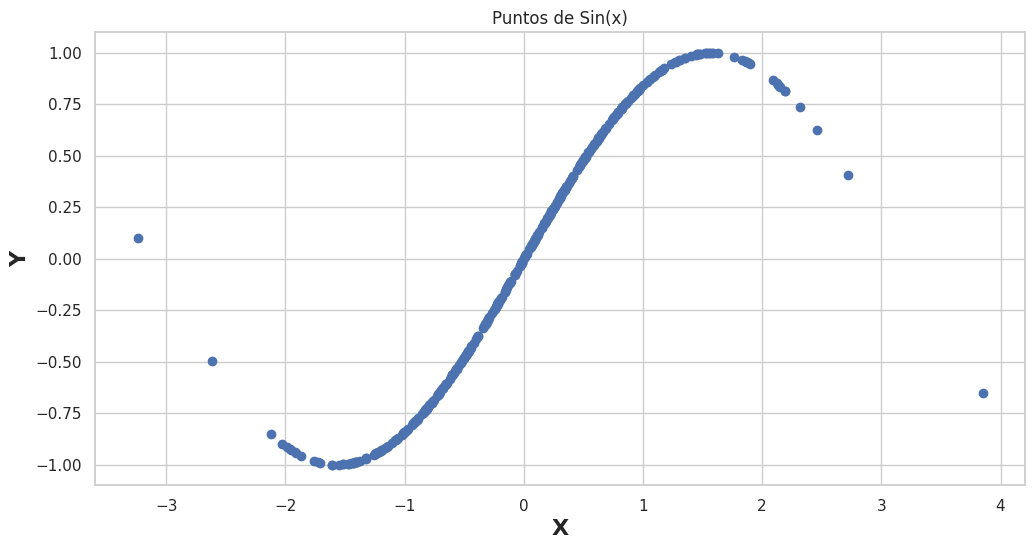

In [26]:

from sklearn.linear_model import (
    LinearRegression,
    TheilSenRegressor,
    RANSACRegressor,
    HuberRegressor,
)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

np.random.seed(42)

# Train data
X = np.random.normal(size=400)
y = np.sin(X)
X = X[:, np.newaxis]


# Test Data
X_test = np.random.normal(size=200)
y_test = np.sin(X_test)
X_test = X_test[:, np.newaxis]

fig = plt.figure(figsize=(12, 6), dpi=100)
plt.scatter(X, y)
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)
plt.title("Puntos de Sin(x)")
plt.show()

### Generando errores en X e Y
Para comprobar la robustez del modelo, pondremos valores atípicos en diferentes ejes y posiciones de X e Y. Luego veremos cómo responde cada modelo a varios valores atípicos. Crearemos 4 conjuntos de datos atípicos montados:

1. Pequeños valores atípicos en Y
2. Pequeños valores atípicos en X
3. Grandes valores atípicos en Y
4. Grandes valores atípicos en X

Text(0.5, 41.25000000000007, 'x')

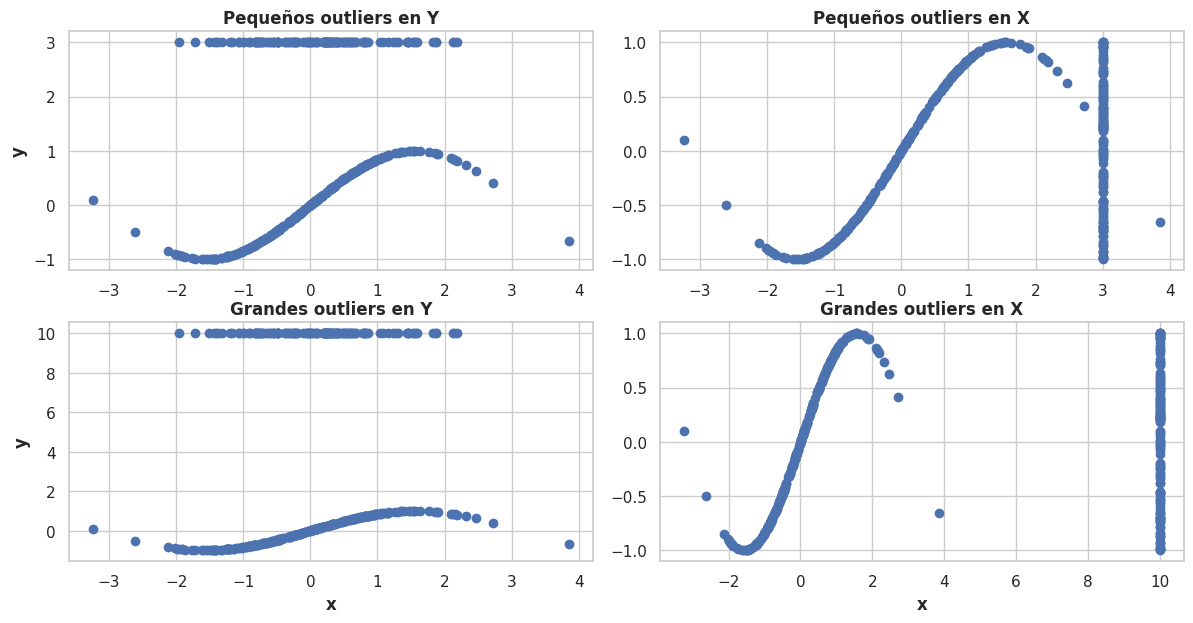

In [27]:
# Small outliers on Y
y_errors = y.copy()
y_errors[::3] = 3

# Small outliers on X
X_errors = X.copy()
X_errors[::3] = 3

# Small outliers on Y
y_errors_large = y.copy()
y_errors_large[::3] = 10

# Large outliers on X
X_errors_large = X.copy()
X_errors_large[::3] = 10

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), dpi=100)
fig.tight_layout()
ax[0, 0].scatter(X, y_errors)
ax[0, 0].set_title("Pequeños outliers en Y", weight="bold")
ax[0, 0].set_ylabel("y", weight="bold")

ax[0, 1].scatter(X_errors, y)
ax[0, 1].set_title("Pequeños outliers en X", weight="bold")


ax[1, 0].scatter(X, y_errors_large)
ax[1, 0].set_title("Grandes outliers en Y", weight="bold")
ax[1, 0].set_ylabel("y", weight="bold")
ax[1, 0].set_xlabel("x", weight="bold")


ax[1, 1].scatter(X_errors_large, y)
ax[1, 1].set_title("Grandes outliers en X", weight="bold")
ax[1, 1].set_xlabel("x", weight="bold")


### Definición de modelos

Ahora que tenemos nuestros datos listos, podemos construir modelos para una regresión robusta.

En lugar de ejecutar modelos individualmente, se pueden iterar utilizando for loop y scikit-learn pipeline. Para iterar, primero construiremos un diccionario que contiene instancias de los modelos, colores para trazarlos y sus estilos de línea. Por lo tanto, al usar esto, podemos trazar la línea de ajuste de todos los modelos en una sola gráfica.

In [28]:
estimators = [
    ('OLS', LinearRegression()),
    ('Theil-Sen', TheilSenRegressor(random_state=42)),
    ('RANSAC', RANSACRegressor(random_state=42)),
    ('HuberRegressor', HuberRegressor()),
]
colors = {
    'OLS': 'turquoise',
    'Theil-Sen': 'gold',
    'RANSAC': 'lightgreen',
    'HuberRegressor': 'black',
}
linestyle = {'OLS': '-', 'Theil-Sen': '-.', 'RANSAC': '--', 'HuberRegressor': '--'}
lw = 3
x_plot = np.linspace(X.min(), X.max())

En el siguiente loop:

1. El modelo se construye usando sklearn pipeline make_pipeline (PolynomialFeatures (3), estimator). Hemos usado PolynomialFeatures porque nuestros datos son sinusoidales y no se pueden ajustar usando una recta. Una vez generados los polinomios, se pasan al estimador definido en un diccionario.
2. El modelo se ajusta usando fit (this_X, this_y), donde this_X y this_y son datos de error pasados a través del bucle.
3. El rendimiento del modelo se calcula utilizando mean_squared_error sobre los datos de test (model.predict (X_test), y_test)
4. La Y pronosticada se calcula de forma simple utilizando model.predict (x_plot [:, np.newaxis]).


Después de construir, ajustar y predecir, los datos se trazan para cada uno de los modelos y para cada uno de los cuatro tipos de error.

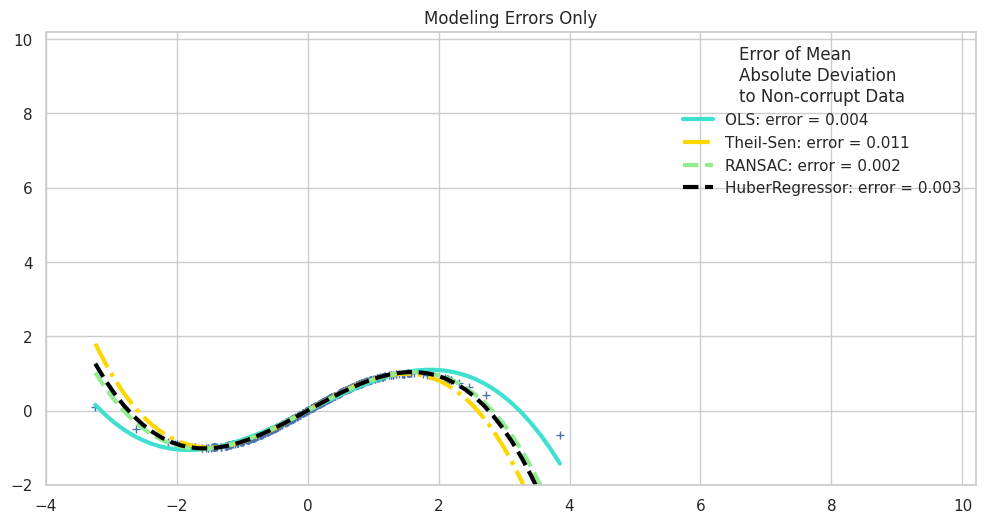

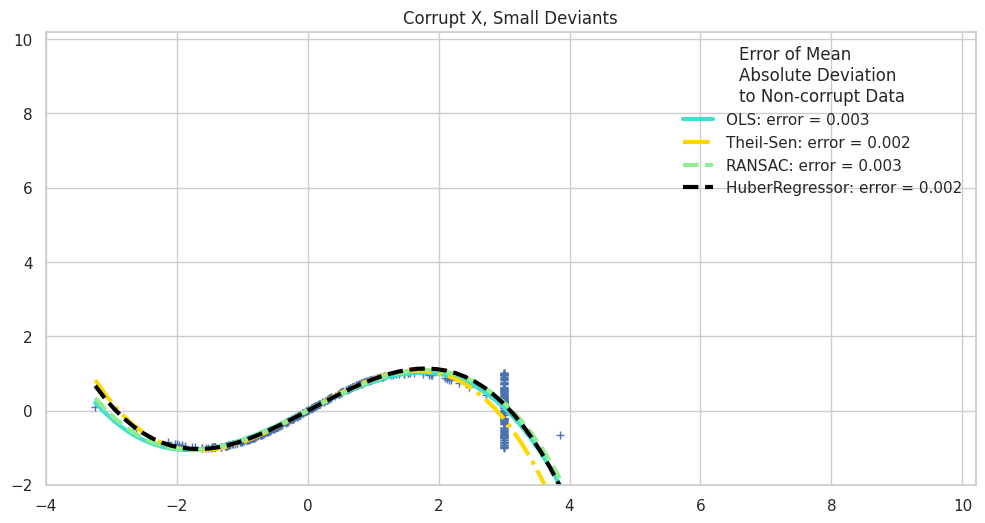

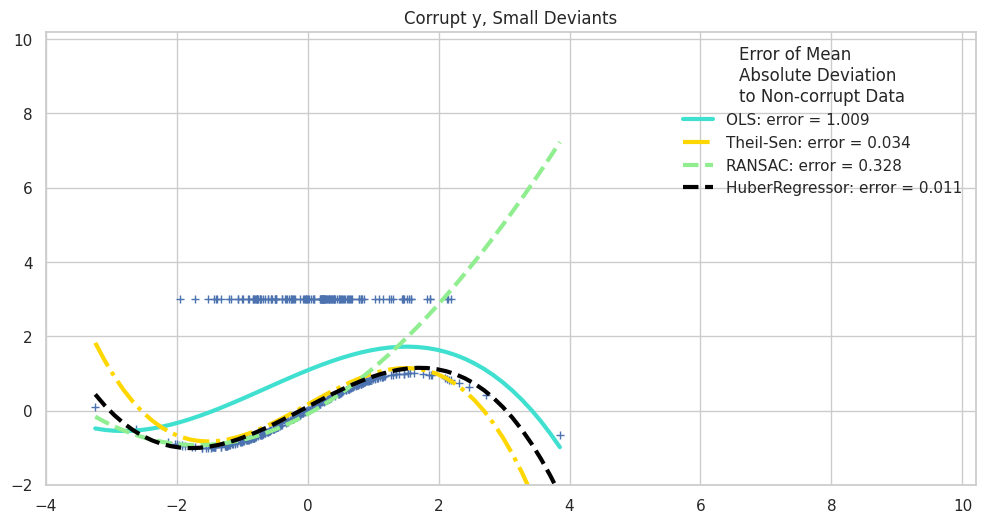

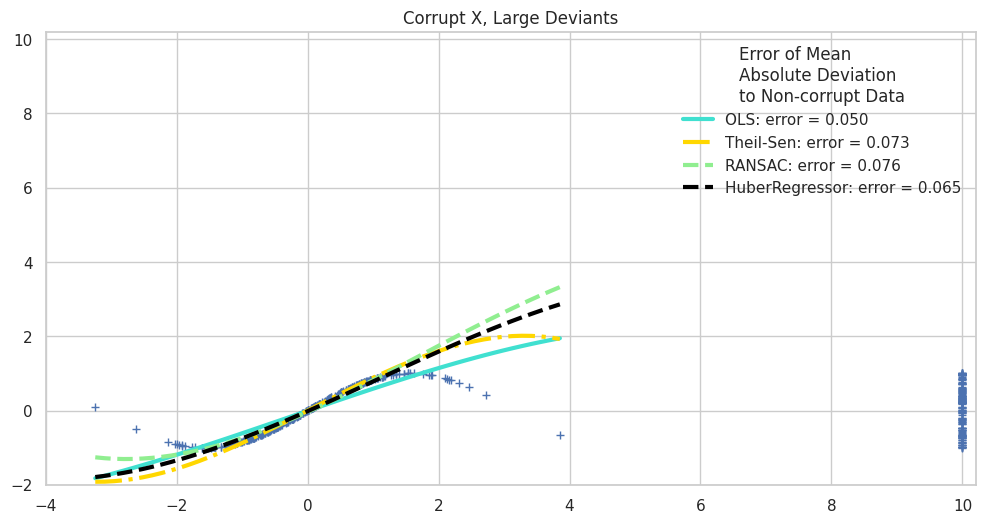

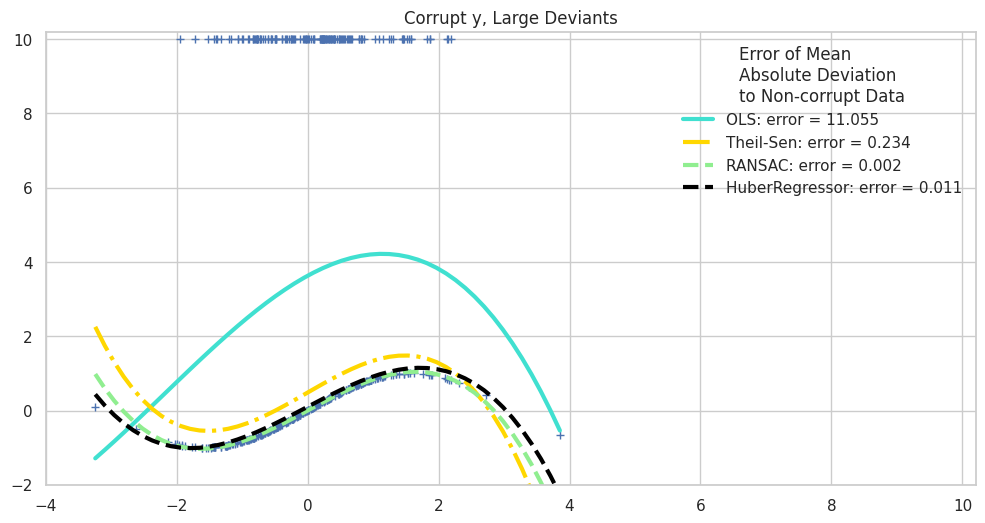

In [29]:
for title, this_X, this_y in [
    ('Modeling Errors Only', X, y),
    ('Corrupt X, Small Deviants', X_errors, y),
    ('Corrupt y, Small Deviants', X, y_errors),
    ('Corrupt X, Large Deviants', X_errors_large, y),
    ('Corrupt y, Large Deviants', X, y_errors_large),
]:
    plt.figure(figsize=(12, 6), dpi=100)
    plt.plot(this_X[:, 0], this_y, 'b+')

    for name, estimator in estimators:
        model = make_pipeline(PolynomialFeatures(3), estimator)
        model.fit(this_X, this_y)
        mse = mean_squared_error(model.predict(X_test), y_test)
        y_plot = model.predict(x_plot[:, np.newaxis])
        plt.plot(
            x_plot,
            y_plot,
            color=colors[name],
            linestyle=linestyle[name],
            linewidth=lw,
            label='%s: error = %.3f' % (name, mse),
        )

    legend_title = 'Error of Mean\nAbsolute Deviation\nto Non-corrupt Data'
    legend = plt.legend(loc='upper right', frameon=False, title=legend_title)
    plt.xlim(-4, 10.2)
    plt.ylim(-2, 10.2)
    plt.title(title)
plt.show()

### Qué podemos inferir

* RANSAC es bueno para valores atípicos grandes en la dirección y.
* TheilSen es bueno para pequeños valores atípicos, tanto en la dirección X como en y, pero tiene un punto de quiebre por encima del cual se desempeña peor que OLS, igual que RANSAC.
* Es posible que las puntuaciones de HuberRegressor no se comparen directamente con TheilSen y RANSAC porque no intenta filtrar completamente los valores atípicos, sino que reduce su efecto.

A pesar de un rendimiento superior sobre los modelos de mínimos cuadrados, los modelos robustos todavía no se utilizan ampliamente. Las razones son:
La regresión robusta requiere cálculos pesados. A veces, los valores atípicos son un requisito de un modelo y no es facil determinar qué es un valor atípico, sobretodo en datos de alta dimensión. *The End*
